In [39]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [40]:
#converting the genre to binary
changing_to_binary = ['Genre']
data[changing_to_binary] = data[changing_to_binary].apply(lambda x : x.map({'Female' : 1, 'Male': 0}))

#checking whether it changed or not
print("After changing to binary: ", data['Genre'].unique())

After changing to binary:  [0 1]


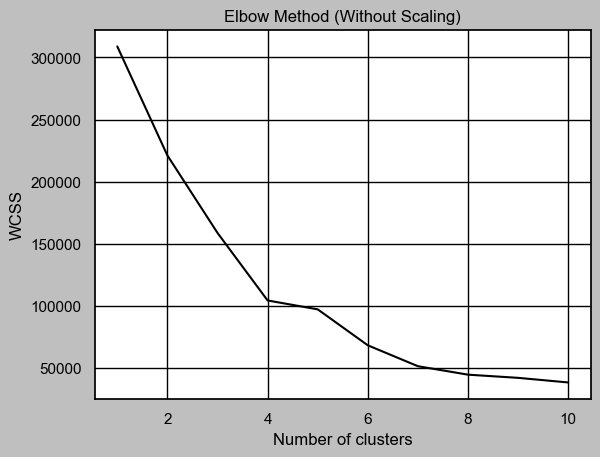

In [41]:
#Without feature scaling
x = data.drop('CustomerID', axis=1)
plt.style.use('grayscale')
#sns.set_theme(style="darkgrid")
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method (Without Scaling)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

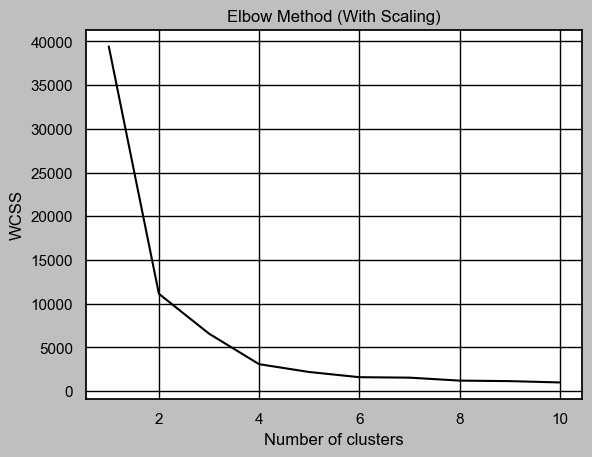

In [42]:
#clustering with optimal k = 5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters_no_scale = kmeans.fit_predict(x)

#scaling (all features except Age)
scaler = StandardScaler()
X_scaled = x.copy()
cols_to_scale = ['Annual Income (k$)', 'Spending Score (1-100)', 'Genre']
X_scaled[cols_to_scale] = scaler.fit_transform(X_scaled[cols_to_scale])

wcss_scaled = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss_scaled.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss_scaled)
plt.title('Elbow Method (With Scaling)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Perform clustering with scaled features
kmeans_scaled = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters_scaled = kmeans_scaled.fit_predict(X_scaled)

Cluster distribution without scaling: 0    89
3    38
4    33
2    29
1    11
Name: count, dtype: int64
Cluster distribution with scaling: 1    58
3    41
2    40
4    33
0    28
Name: count, dtype: int64


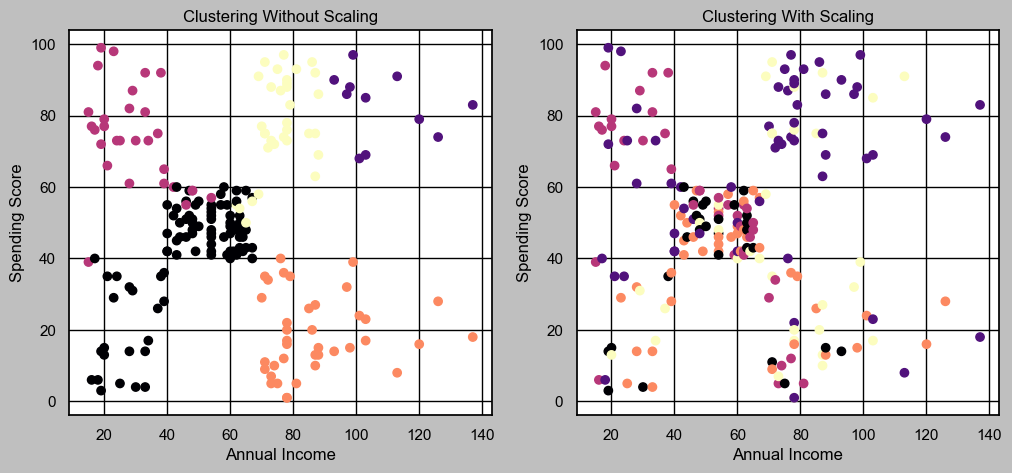

In [44]:
# Compare results
print("Cluster distribution without scaling:", pd.Series(clusters_no_scale).value_counts())
print("Cluster distribution with scaling:", pd.Series(clusters_scaled).value_counts())

# Visualization (using first two features for simplicity)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(x.iloc[:, 2], x.iloc[:, 3], c=clusters_no_scale, cmap='magma')
plt.title('Clustering Without Scaling')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

plt.subplot(1, 2, 2)
plt.scatter(x.iloc[:, 2], x.iloc[:, 3], c=clusters_scaled, cmap='magma')
plt.title('Clustering With Scaling')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()